# matplotlib 시각화
https://matplotlib.org/stable/api/index.html

https://matplotlib.org/cheatsheets/cheatsheets.pdf

https://wikidocs.net/book/5011

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('../titanic/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
train['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [4]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

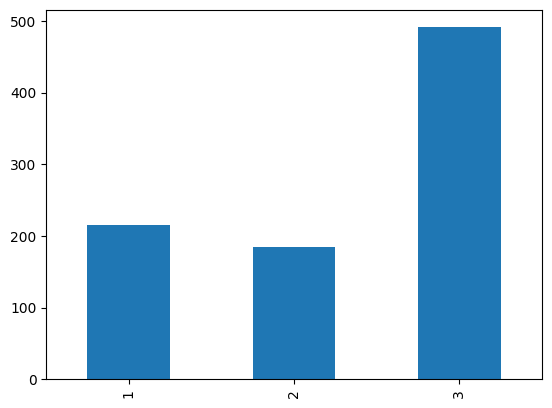

In [5]:
train['Pclass'].value_counts().sort_index().plot(kind='bar')
plt.show()

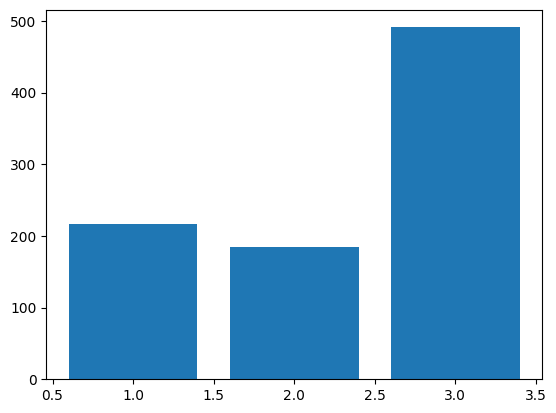

In [6]:
plt.bar(train['Pclass'].unique(), train['Pclass'].value_counts())
plt.show()

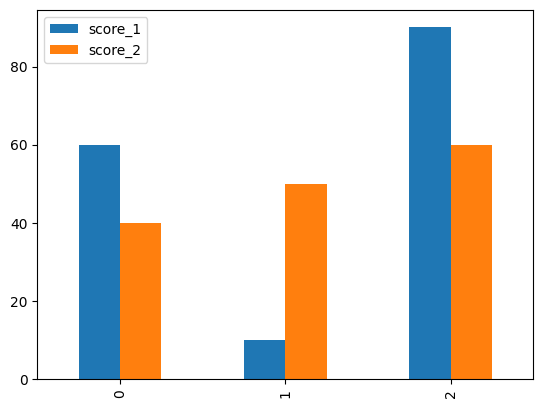

In [7]:
df = pd.DataFrame({'sub':['kor','eng','mat'],
                   'score_1':[60,10,90],
                   'score_2':[40,50,60]})
df.plot(kind='bar')
plt.show()

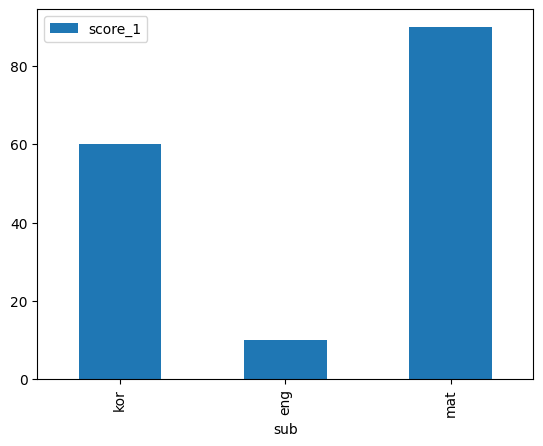

In [8]:
df.plot('sub', 'score_1', kind='bar')
plt.show()

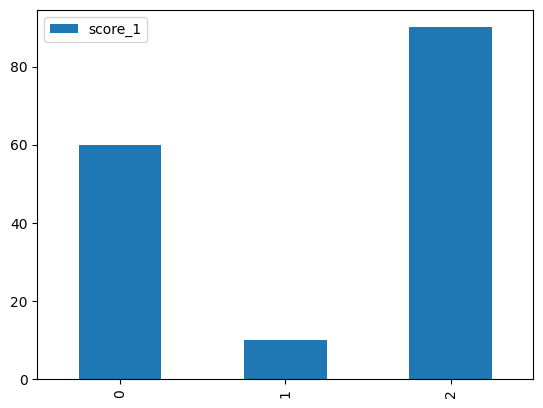

In [9]:
df[['sub','score_1']].plot(kind='bar')
plt.show()

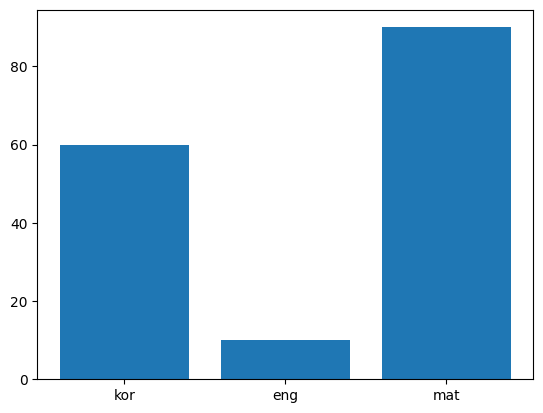

In [10]:
plt.bar(df['sub'], df['score_1'])
plt.show()

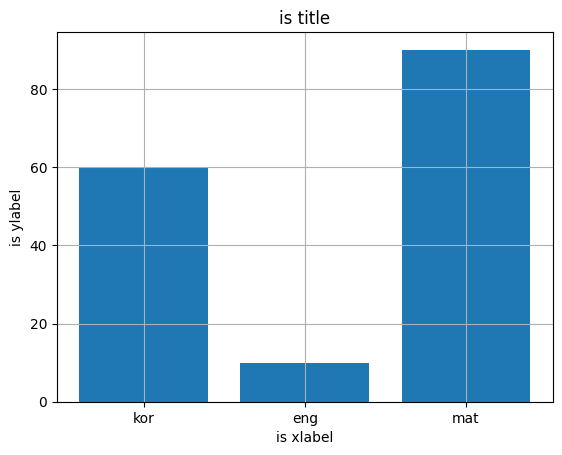

In [11]:
plt.bar(df['sub'], df['score_1'])
plt.title('is title')
plt.xlabel('is xlabel')
plt.ylabel('is ylabel')
plt.grid()
plt.show()

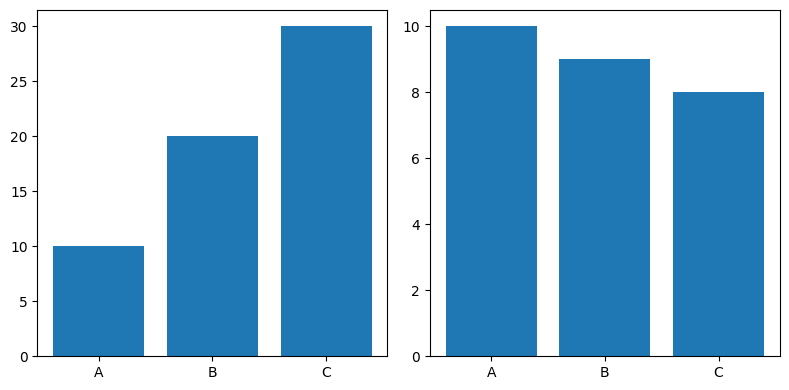

In [12]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.bar(['A','B','C'], [10,20,30])

plt.subplot(1,2,2)
plt.bar(['A','B','C'], [10,9,8])

plt.tight_layout()
plt.show()

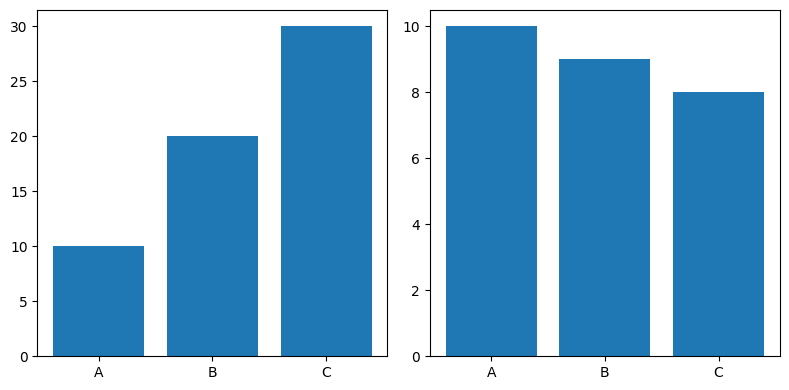

In [74]:
fig, ax = plt.subplots(1, 2, figsize=(8,4))
ax[0].bar(['A','B','C'], [10,20,30])
ax[1].bar(['A','B','C'], [10,9,8])

plt.tight_layout()
plt.show()

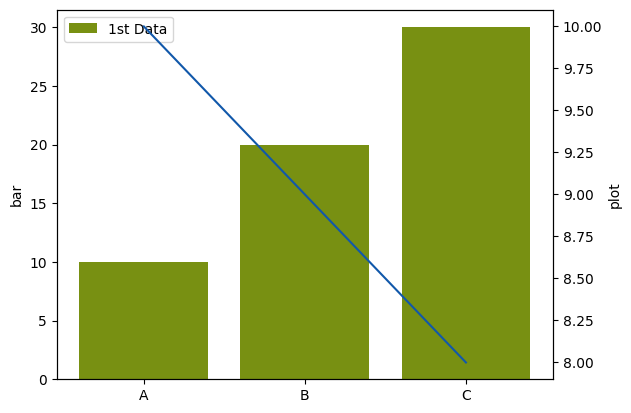

In [14]:
fig, ax1 = plt.subplots()
ax1.bar(['A','B','C'], [10,20,30], color='#789012', label='1st Data')
ax1.set_ylabel('bar')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(['A','B','C'], [10,9,8], color='#1158aa')
ax2.set_ylabel('plot')

plt.show()

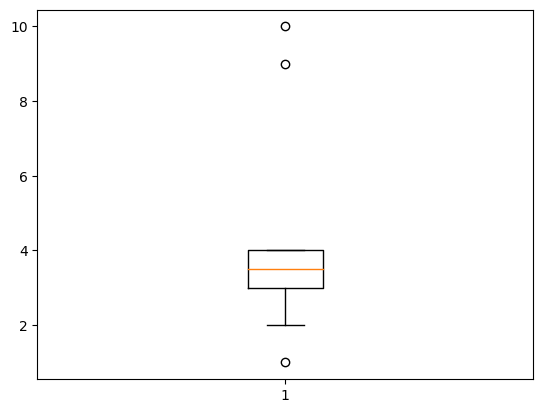

In [32]:
plt.boxplot([1,2,3,3,3,4,4,4,9,10])
plt.show()

In [15]:
train['Age'].mean()

29.69911764705882

In [16]:
train['age'] = train['Age'].fillna(train['Age'].mean())
train['age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [53]:
q1 = train['age'].quantile(0.25)
q2 = train['age'].quantile(0.5)
q3 = train['age'].quantile(0.75)
IQR = q3-q1
v_min = q1 - 1.5*IQR
v_max = q3 + 1.5*IQR

In [58]:
train['age'].mean()

29.69911764705882

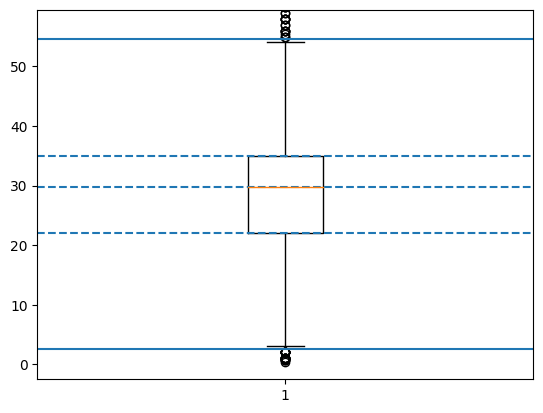

In [63]:
plt.boxplot(train['age'], whis=1.5)
plt.ylim([v_min-5, v_max+5])
plt.axhline(v_max,0,1)             # 3분위수 + 1.5*(3분위수-1분위수)
plt.axhline(q3,0,1,linestyle='--') # 3분위수
plt.axhline(q2,0,1,linestyle='--') # 중앙값 --- 평균아님
plt.axhline(q1,0,1,linestyle='--') # 1분위수
plt.axhline(v_min,0,1)             # 1분위수 - 1.5*(3분위수-1분위수)
plt.show()

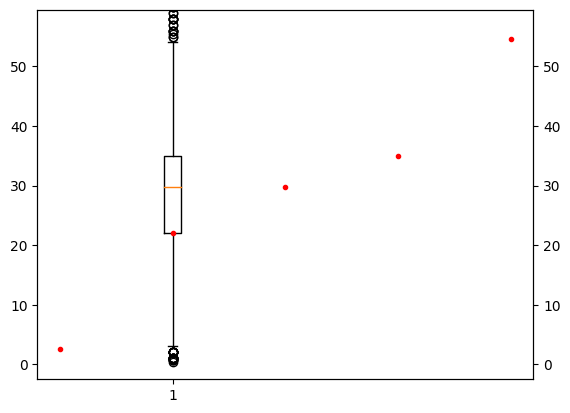

In [55]:
fig, ax1 = plt.subplots()
ax1.boxplot(train['age'])
ax1.set_ylim([v_min-5, v_max+5])

ax2 = ax1.twinx()
ax2.plot(['A','B','C','D','E'], [v_min,q1,q2,q3,v_max], 'r.')
ax2.set_ylim([v_min-5, v_max+5])

plt.show()

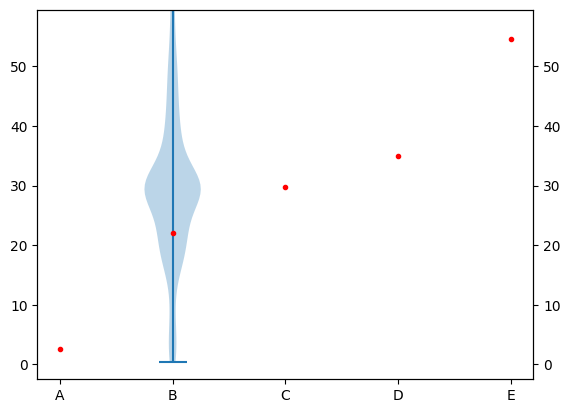

In [69]:
fig, ax1 = plt.subplots()
ax1.violinplot(train['age'])
ax1.set_ylim([v_min-5, v_max+5])

ax2 = ax1.twinx()
ax2.plot(['A','B','C','D','E'], [v_min,q1,q2,q3,v_max], 'r.')
ax2.set_ylim([v_min-5, v_max+5])

plt.show()

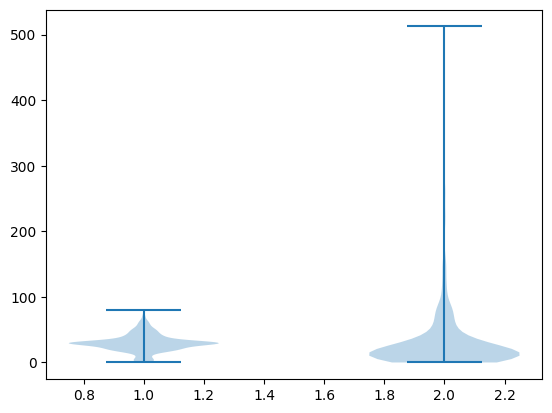

In [72]:
plt.violinplot([train['age'], train['Fare']])

plt.show()

In [62]:
print(v_min, v_max)
train['age'][(train['age']<v_min)|(train['age']>v_max)]

2.5 54.5


7       2.00
11     58.00
15     55.00
16      2.00
33     66.00
       ...  
827     1.00
829    62.00
831     0.83
851    74.00
879    56.00
Name: age, Length: 66, dtype: float64

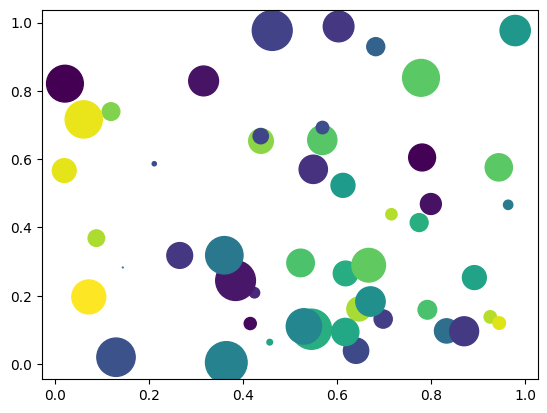

In [22]:
np.random.seed(0)
n = 50
x = np.random.rand(n)
y = np.random.rand(n)
area = (30 * np.random.rand(n))**2
colors = np.random.rand(n)

plt.scatter(x, y, s=area, c=colors)
plt.show()

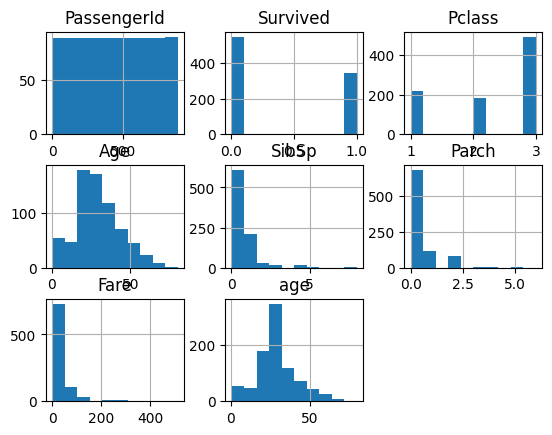

In [73]:
train.hist()
plt.show()

In [24]:
# ! pip install seaborn

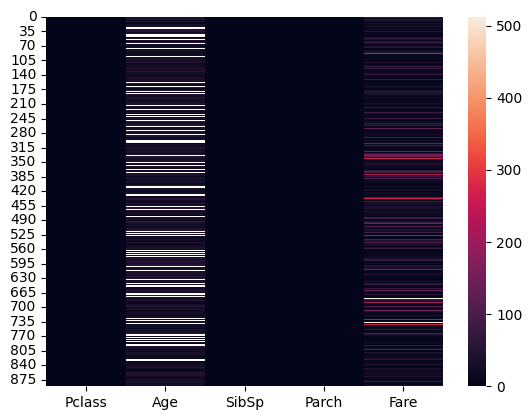

In [25]:
import seaborn as sns

sns.heatmap(train[[ 'Pclass','Age', 'SibSp','Parch', 'Fare']])
plt.show()